### Car Insuracnce data Analysis and Claim amount prediction

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('C:/Users/Azri/fdm-project/data/Car_Insurance_Claim.csv')

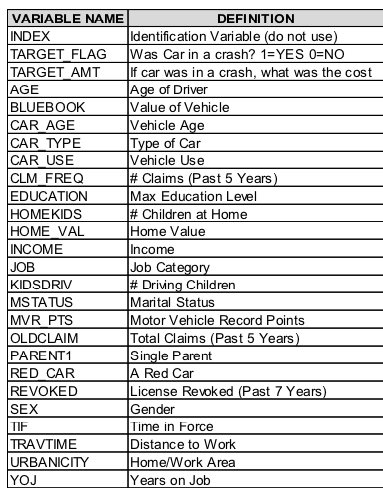

In [3]:
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [5]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [6]:
df['CLAIM_FLAG'].unique()

array([0, 1], dtype=int64)

In [7]:
((df['CLAIM_FLAG'].value_counts()/df['CLAIM_FLAG'].count())*100).round()

CLAIM_FLAG
0    73.0
1    27.0
Name: count, dtype: float64

<BarContainer object of 2 artists>

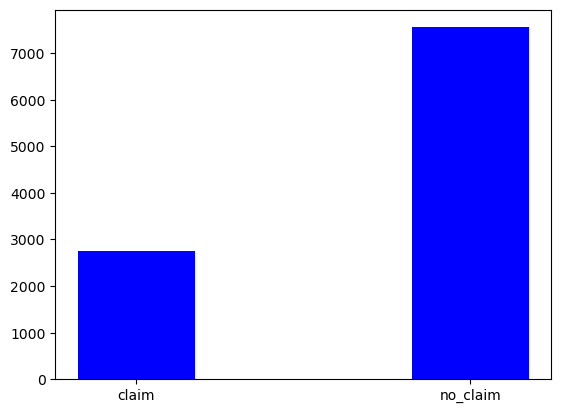

In [8]:
no_claims_count = (df.CLAIM_FLAG == 0).sum()
no_claims_count

claims_count = (df.CLAIM_FLAG == 1).sum()
claims_count, no_claims_count

x =['claim', 'no_claim']

plt.bar(x,[claims_count, no_claims_count], width=0.35, color='blue')


## There seems to be a slight data imbalance
This may cause issues down the road during model training
Measures that we can use to handle this
* Gnerate synthetic samples (SMOTE)
* Under sampling the majority class (not advised)
* Over sampling the minority class
* A mix of both under sampling and over sampling

## **feature exploration**

### Missing values check

In [9]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

<Axes: >

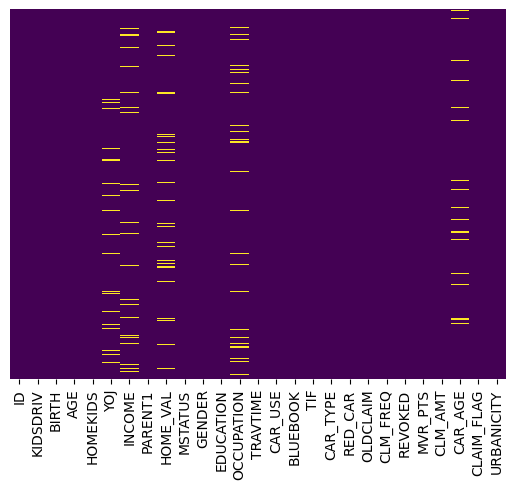

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,  cmap='viridis' )

### Distribution of data in categorical features

### Gender

In [11]:
df['GENDER'].unique()

array(['M', 'z_F'], dtype=object)

In [12]:
Gender_Types = df.GENDER.value_counts().index

Gender_Counts = df.GENDER.value_counts().values

Gender_Types, Gender_Counts

(Index(['z_F', 'M'], dtype='object', name='GENDER'),
 array([5545, 4757], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff9a881070>,
 [Text(-0.13184754692436554, 1.0920696975788804, 'z_F'),
  Text(0.1318476491713088, -1.0920696852344174, 'M')],
 [Text(-0.07191684377692664, 0.595674380497571, '53.82%'),
  Text(0.0719168995479866, -0.5956743737642276, '46.18%')])

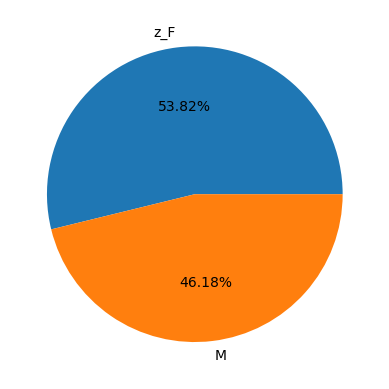

In [42]:
plt.pie(Gender_Counts, labels=Gender_Types, autopct='%1.2f%%' )

### MSTATUS (Marital_Status)

In [14]:
df['MSTATUS'].unique()

array(['z_No', 'Yes'], dtype=object)

In [40]:
Mstatus_types = df.MSTATUS.value_counts().index

Mstatus_val = df.MSTATUS.value_counts().values

Mstatus_types,Mstatus_val

(Index(['Yes', 'z_No'], dtype='object', name='MSTATUS'),
 array([6188, 4114], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff9a822000>,
 [Text(-0.3420874091214939, 1.04545502271525, 'Yes'),
  Text(0.3420875070040555, -1.0454549906867108, 'z_No')])

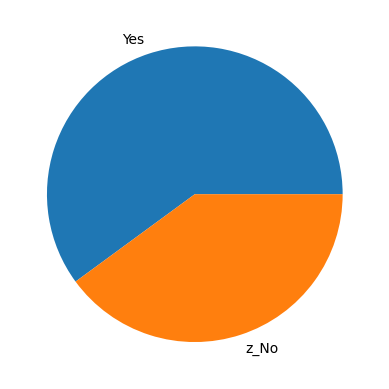

In [41]:
plt.pie(Mstatus_val, labels= Mstatus_types)

### PARENT1 ( Is the person a single parent? )

In [16]:
df['PARENT1'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
parent_Types = df.PARENT1.value_counts().index

parent_Counts = df.PARENT1.value_counts().values

parent_Types, parent_Counts

(Index(['No', 'Yes'], dtype='object', name='PARENT1'),
 array([8959, 1343], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff9821a5d0>,
 [Text(-1.0090311696810421, 0.438013810983293, 'No'),
  Text(1.0090311491761348, -0.4380138582194507, 'Yes')])

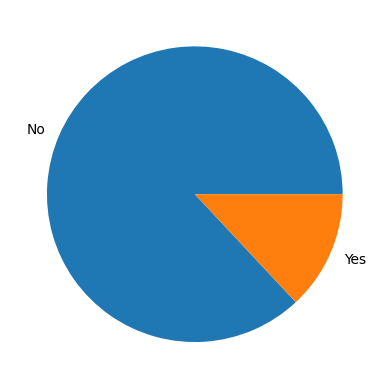

In [18]:
plt.pie(parent_Counts, labels= parent_Types)

### URBANICITY ( Home/ Work area)

In [19]:
df['URBANICITY'].unique()

array(['Highly Urban/ Urban', 'z_Highly Rural/ Rural'], dtype=object)

In [20]:
wArea_index = df.URBANICITY.value_counts().index

wArea_val = df.URBANICITY.value_counts().values

wArea_index, wArea_val

(Index(['Highly Urban/ Urban', 'z_Highly Rural/ Rural'], dtype='object', name='URBANICITY'),
 array([8230, 2072], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff9821b980>,
 [Text(-0.8876259963624045, 0.6497076962616721, 'Highly Urban/ Urban'),
  Text(0.8876260267774156, -0.6497076547088997, 'z_Highly Rural/ Rural')])

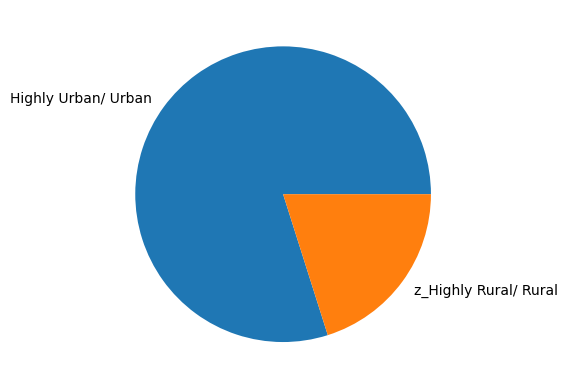

In [21]:
plt.pie(wArea_val, labels = wArea_index)

### EDUCATION (Education level)

In [22]:
df['EDUCATION'].unique()

array(['PhD', 'z_High School', 'Bachelors', '<High School', 'Masters'],
      dtype=object)

In [23]:
edLevel_index = df.EDUCATION.value_counts().index

edLevel_val = df.EDUCATION.value_counts().values

edLevel_index, edLevel_val

(Index(['z_High School', 'Bachelors', 'Masters', '<High School', 'PhD'], dtype='object', name='EDUCATION'),
 array([2952, 2823, 2078, 1515,  934], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff98226690>,
 [Text(0.6835885197819177, 0.8618043488068314, 'z_High School'),
  Text(-0.9755440196920153, 0.5082458712504657, 'Bachelors'),
  Text(-0.5810705599147047, -0.9340005376874319, 'Masters'),
  Text(0.564748497385663, -0.9439592865694135, '<High School'),
  Text(1.0556824959367865, -0.3090865053228249, 'PhD')])

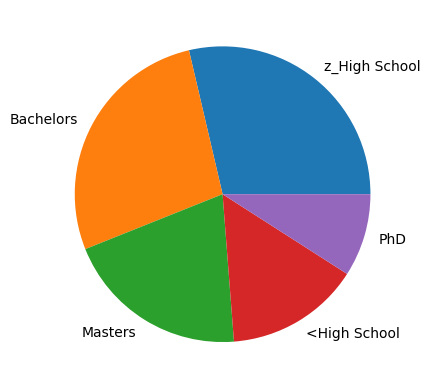

In [24]:
plt.pie(edLevel_val, labels = edLevel_index)

### OCCUPATION 
 ***nan values will be ignored in the pie chart***
 
 `.value_counts` ignores NA values by default

In [25]:
df['OCCUPATION'].unique()

array(['Professional', 'z_Blue Collar', 'Manager', 'Clerical', 'Doctor',
       'Lawyer', nan, 'Home Maker', 'Student'], dtype=object)

In [26]:
occ_index = df.OCCUPATION.value_counts().index

occ_val = df.OCCUPATION.value_counts().values

occ_index, occ_val

(Index(['z_Blue Collar', 'Clerical', 'Professional', 'Manager', 'Lawyer',
        'Student', 'Home Maker', 'Doctor'],
       dtype='object', name='OCCUPATION'),
 array([2288, 1590, 1408, 1257, 1031,  899,  843,  321], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff98e21d00>,
 [Text(0.8079464320584789, 0.746473417426216, 'z_Blue Collar'),
  Text(-0.46781200475538204, 0.9955661345218361, 'Clerical'),
  Text(-1.0869490935191102, 0.16894279534204779, 'Professional'),
  Text(-0.8309081486821794, -0.7208270586302608, 'Manager'),
  Text(-0.1211373056973322, -1.0933095413323672, 'Lawyer'),
  Text(0.5454389157223369, -0.9552467687543578, 'Student'),
  Text(0.9736038941204318, -0.5119525928770468, 'Home Maker'),
  Text(1.0939828144935797, -0.11489822275695281, 'Doctor')])

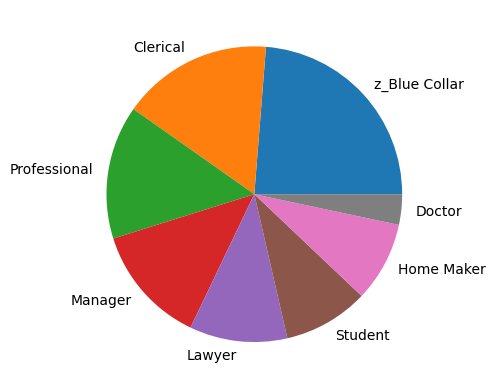

In [27]:
plt.pie(occ_val, labels = occ_index)

### CAR_TYPE

In [28]:
df['CAR_TYPE'].unique()

array(['Minivan', 'Van', 'z_SUV', 'Sports Car', 'Panel Truck', 'Pickup'],
      dtype=object)

In [29]:
cType_index = df.CAR_TYPE.value_counts().index

cType_val = df.CAR_TYPE.value_counts().values

cType_index, cType_val

(Index(['z_SUV', 'Minivan', 'Pickup', 'Sports Car', 'Van', 'Panel Truck'], dtype='object', name='CAR_TYPE'),
 array([2883, 2694, 1772, 1179,  921,  853], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff99702060>,
 [Text(0.7015695075374995, 0.8472309166299296, 'z_SUV'),
  Text(-0.9309757196600739, 0.5859046077676876, 'Minivan'),
  Text(-0.7662288266844867, -0.7892359502441048, 'Pickup'),
  Text(0.14183259251414704, -1.0908178196659222, 'Sports Car'),
  Text(0.7655064732728256, -0.7899366046572351, 'Van'),
  Text(1.0629944208977895, -0.28291847083598765, 'Panel Truck')])

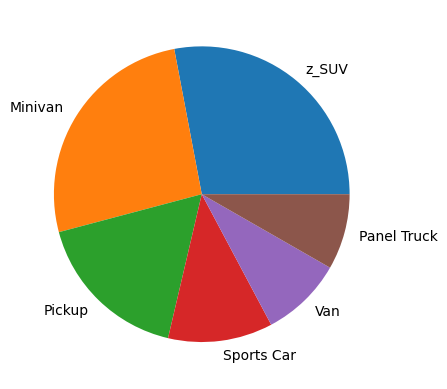

In [30]:
plt.pie(cType_val, labels = cType_index)

### CAR_USE (what is the primary use of the car)

In [31]:
df['CAR_USE'].unique()

array(['Private', 'Commercial'], dtype=object)

In [32]:
cUse_index = df.CAR_USE.value_counts().index

cUse_val = df.CAR_USE.value_counts().values

cUse_index, cUse_val

(Index(['Private', 'Commercial'], dtype='object', name='CAR_USE'),
 array([6513, 3789], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff997553a0>,
 [Text(-0.4438527509564001, 1.0064763958824052, 'Private'),
  Text(0.44385275095640014, -1.0064763958824052, 'Commercial')])

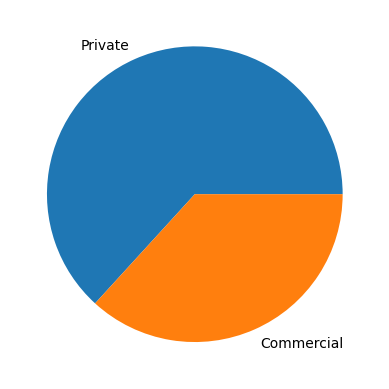

In [33]:
plt.pie(cUse_val, labels =cUse_index)

### RED_CAR (Is the car red?)
* Urban legends suggest red cars are involved in more car accidents

In [34]:
df['RED_CAR'].unique()

array(['yes', 'no'], dtype=object)

In [35]:
cRed_index = df.RED_CAR.value_counts().index

cRed_val = df.RED_CAR.value_counts().values

cRed_index, cRed_val

(Index(['no', 'yes'], dtype='object', name='RED_CAR'),
 array([7326, 2976], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff99787500>,
 [Text(-0.6772628912309699, 0.8667842731392094, 'no'),
  Text(0.6772628912309695, -0.8667842731392097, 'yes')])

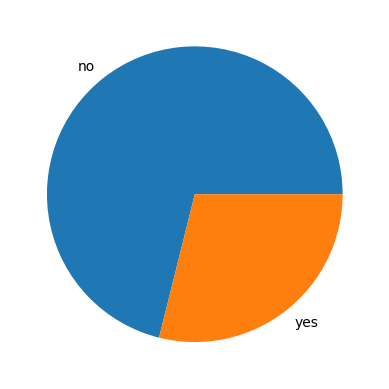

In [36]:
plt.pie(cRed_val, labels =cRed_index)

### REVOKED (Has the license been revoked in the past years?)

In [37]:
df['REVOKED'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
revoked_index = df.REVOKED.value_counts().index

revoked_val = df.REVOKED.value_counts().values

revoked_index, revoked_val

(Index(['No', 'Yes'], dtype='object', name='REVOKED'),
 array([9041, 1261], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ff997e0ec0>,
 [Text(-1.0196674760324742, 0.4126478381399371, 'No'),
  Text(1.0196674470563125, -0.4126479097410557, 'Yes')])

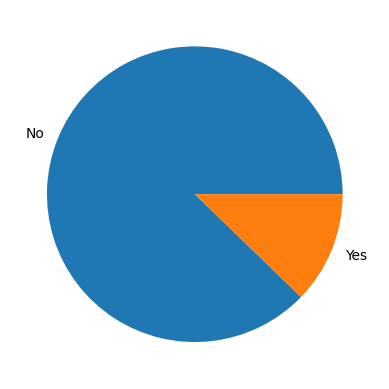

In [39]:
plt.pie(revoked_val, labels = revoked_index)